<a href="https://colab.research.google.com/github/bariskucuk1999/data-science-notes/blob/main/Polinomal_Regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#y=b0+b1x+b2(x^2)+...+bh(x^h)+e
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
veriler=pd.read_csv("maaslar.txt")
veriler

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


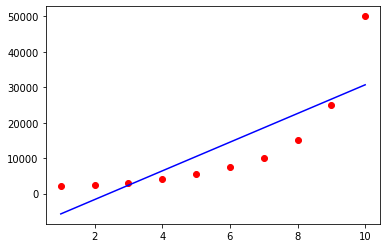

In [ ]:
#verileri ikiye bölersek (data frame slice);
x=veriler.iloc[:,1:2] #eğitim seviyesi
y=veriler.iloc[:,2:] #maas
X=x.values #data frame bu örnekte sklearn'de sıkıntı çıkardığı için numpy array dönüşümü
Y=y.values
#lineer regresyon modeli oluşturma
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,Y)
plt.scatter(X,Y,color="red")
plt.plot(x,lin_reg.predict(X),color="blue")
#kırmızı data point'ler, mavi lineer regresyon modeli

In [ ]:
#polynomial regression modeli oluşturma
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2) #2. dereceden polinom objesi oluşturma
x_poly=poly_reg.fit_transform(X)
x_poly #x0, x(1den 10a) x(kareleri)

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

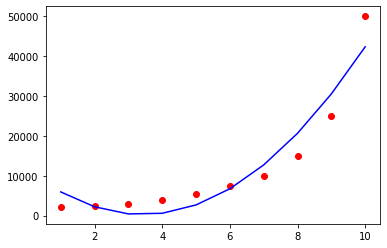

In [ ]:
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y) #x0,x1,x2'ler ile b0,b1,b2'leri öğren
plt.scatter(X,Y,color="red")
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color="blue") #polynomial'e fit'le dönüştürüp çiz

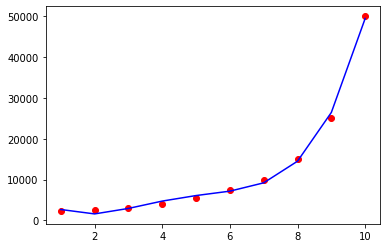

In [ ]:
#4. dereceden polynomial regression oluşturma
from sklearn.preprocessing import PolynomialFeatures
poly_reg3=PolynomialFeatures(degree=4) #4. dereceden polinom objesi oluşturma
x_poly3=poly_reg3.fit_transform(X)
x_poly3
lin_reg3=LinearRegression()
lin_reg3.fit(x_poly3,y)
plt.scatter(X,Y,color="red")
plt.plot(X,lin_reg3.predict(poly_reg3.fit_transform(X)),color="blue")

In [ ]:
lin_reg.predict([[11]]) #eğitim seviyesi=11 için lin_reg tahmini maaşı

array([[34716.66666667]])

In [ ]:
lin_reg2.predict(poly_reg.fit_transform([[11]])) #eğitim seviyesi=11 için poly_reg tahmini maaşı

array([[56091.66666667]])

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y,lin_reg3.predict(poly_reg3.fit_transform(X)))
#polynomial regression R2 değeri

0.9973922891706615

In [ ]:
#linear regression için 0.66 R2 değeri çıkmakta